In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [21]:
# Step 1: Load the data
df_raw = pd.read_excel(r"C:\Users\brand\Downloads\FAOSTAT_data.xlsx")

In [22]:
# Taking only needed columns
df_raw = df_raw[['Area', 'Item', 'Element', 'Year', 'Value']]

In [23]:
df_raw.head()

,Area,Item,Element,Year,Value
0,Afghanistan,"Almonds, in shell",Area harvested,2019,29203.0
1,Afghanistan,"Almonds, in shell",Yield,2019,1308.3
2,Afghanistan,"Almonds, in shell",Production,2019,38205.0
3,Afghanistan,"Almonds, in shell",Area harvested,2020,22134.0
4,Afghanistan,"Almonds, in shell",Yield,2020,1775.9


In [24]:
# Filtering rows
relevant_elements = ['Area harvested', 'Yield', 'Production']
df_filtered = df_raw[df_raw['Element'].isin(relevant_elements)]

In [25]:
df_filtered.head()

,Area,Item,Element,Year,Value
0,Afghanistan,"Almonds, in shell",Area harvested,2019,29203.0
1,Afghanistan,"Almonds, in shell",Yield,2019,1308.3
2,Afghanistan,"Almonds, in shell",Production,2019,38205.0
3,Afghanistan,"Almonds, in shell",Area harvested,2020,22134.0
4,Afghanistan,"Almonds, in shell",Yield,2020,1775.9


In [26]:
# Drop rows with missing values 
df_filtered = df_filtered.dropna(subset=['Area', 'Item', 'Element', 'Year', 'Value'])

In [27]:
# creating pivot table
df_pivot = df_filtered.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='mean'  
).reset_index()

In [28]:
# renaming pivot columns
df_pivot.columns.name = None  
df_pivot = df_pivot.rename(columns={
    'Area harvested': 'Area_Harvested',
    'Yield': 'Yield',
    'Production': 'Production'
})

In [29]:

print(df_pivot.head())

          Area               Item  Year  Area_Harvested  Production   Yield
0  Afghanistan  Almonds, in shell  2019         29203.0     38205.0  1308.3
1  Afghanistan  Almonds, in shell  2020         22134.0     39307.0  1775.9
2  Afghanistan  Almonds, in shell  2021         36862.0     64256.0  1743.2
3  Afghanistan  Almonds, in shell  2022         36462.0     63515.0  1742.0
4  Afghanistan  Almonds, in shell  2023         37000.0     67000.0  1810.8


C:\Users\brand\AppData\Local\Temp\ipykernel_1928\3885595794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_area.head(10).values, y=crop_area.head(10).index, palette='viridis')


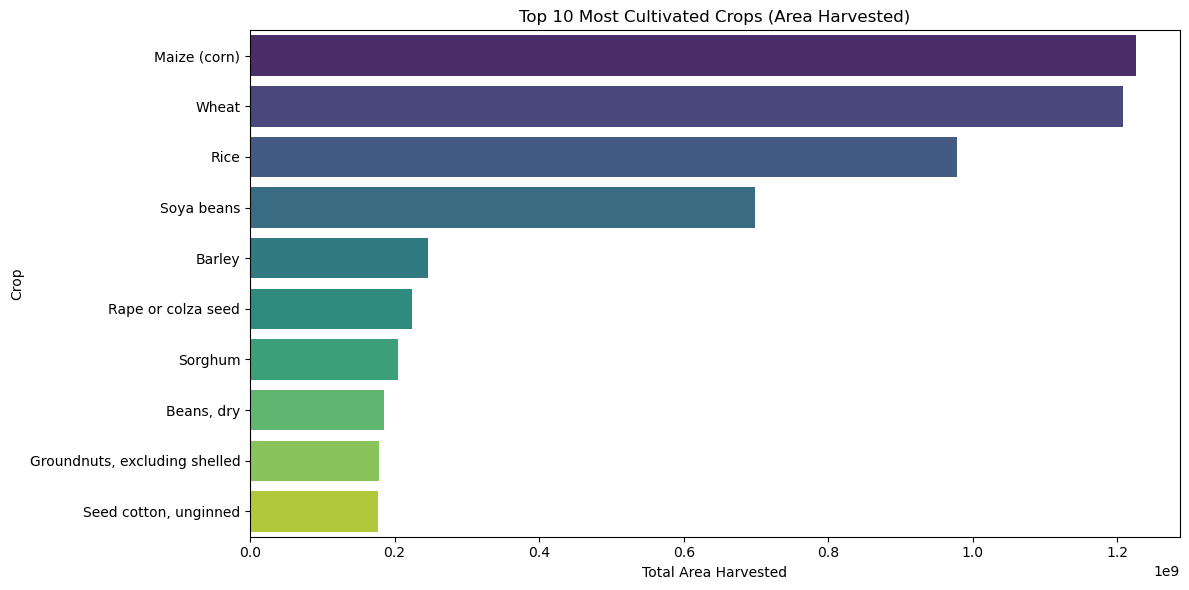

In [32]:
#Analyze Crop Distribution
#Crop Types
import matplotlib.pyplot as plt
import seaborn as sns

# Total area harvested per crop
crop_area = df_pivot.groupby('Item')['Area_Harvested'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=crop_area.head(10).values, y=crop_area.head(10).index, palette='viridis')
plt.title('Top 10 Most Cultivated Crops (Area Harvested)')
plt.xlabel('Total Area Harvested')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()



C:\Users\brand\AppData\Local\Temp\ipykernel_1928\1251033373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_area.head(10).values, y=region_area.head(10).index, palette='magma')


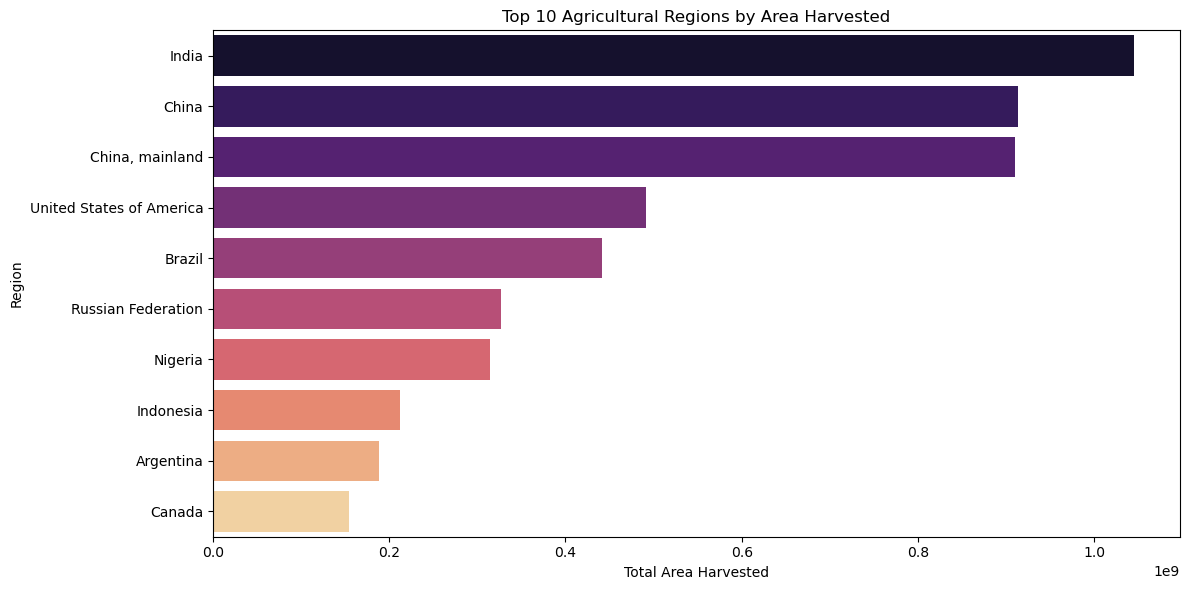

In [33]:
#Geographical Distribution
region_area = df_pivot.groupby('Area')['Area_Harvested'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=region_area.head(10).values, y=region_area.head(10).index, palette='magma')
plt.title('Top 10 Agricultural Regions by Area Harvested')
plt.xlabel('Total Area Harvested')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

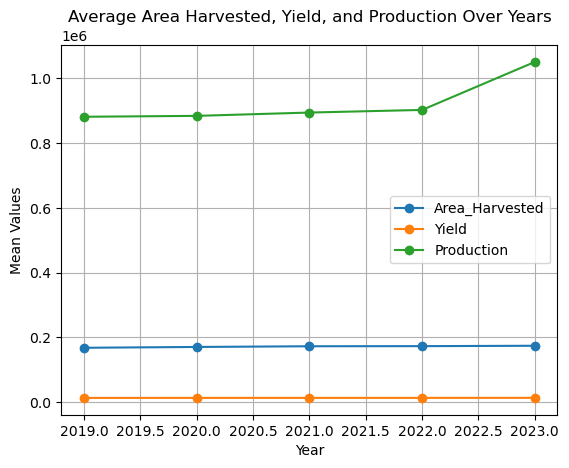

In [34]:
#Temporal Analysis
#Yearly Trends in Area, Yield, Production

yearly_trends = df_pivot.groupby('Year')[['Area_Harvested', 'Yield', 'Production']].mean()

plt.figure(figsize=(14,6))
yearly_trends.plot(marker='o')
plt.title('Average Area Harvested, Yield, and Production Over Years')
plt.ylabel('Mean Values')
plt.grid(True)
plt.show()

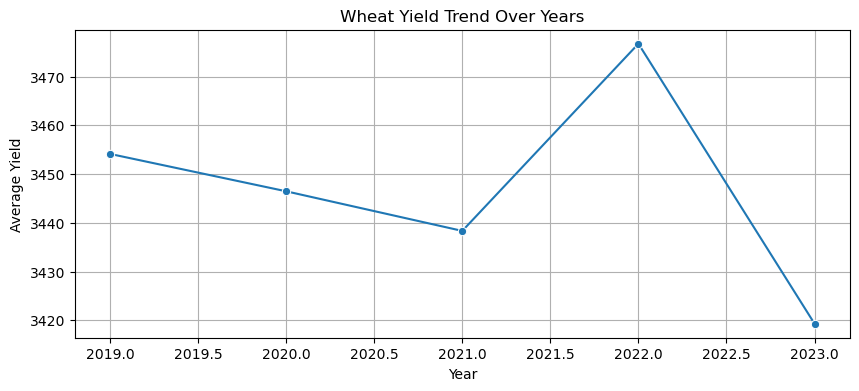

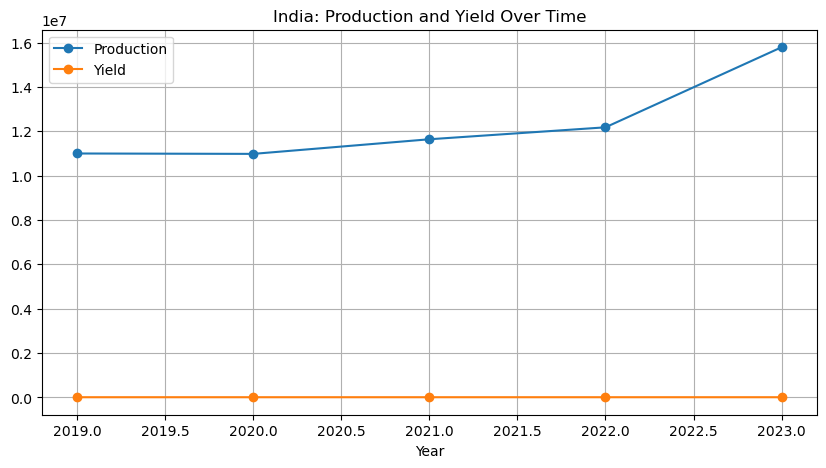

In [35]:
#Growth Analysis
# Example: Trend of Yield for Wheat over years
wheat = df_pivot[df_pivot['Item'] == 'Wheat']
wheat_trend = wheat.groupby('Year')['Yield'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=wheat_trend.index, y=wheat_trend.values, marker='o')
plt.title('Wheat Yield Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.show()

# Region-wise example
india = df_pivot[df_pivot['Area'] == 'India']
india_trend = india.groupby('Year')[['Production', 'Yield']].mean()

india_trend.plot(title='India: Production and Yield Over Time', marker='o', figsize=(10,5))
plt.grid(True)
plt.show()

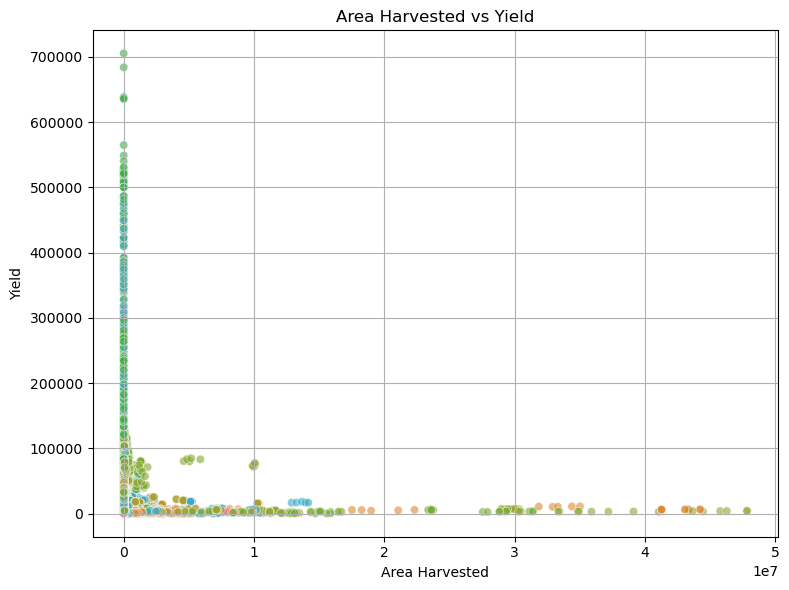

In [36]:
#Environmental Relationships
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pivot, x='Area_Harvested', y='Yield', hue='Item', alpha=0.6, legend=False)
plt.title('Area Harvested vs Yield')
plt.xlabel('Area Harvested')
plt.ylabel('Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Matrix:
                Area_Harvested     Yield  Production
Area_Harvested        1.000000 -0.026551    0.641093
Yield                -0.026551  1.000000    0.068794
Production            0.641093  0.068794    1.000000


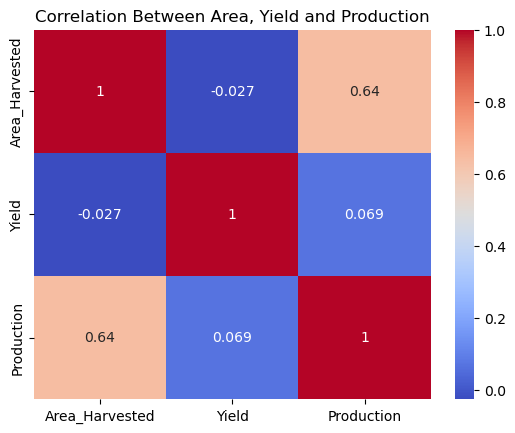

In [37]:
#Input-Output Relationships
correlation = df_pivot[['Area_Harvested', 'Yield', 'Production']].corr()
print("Correlation Matrix:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Area, Yield and Production')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_1928\65896514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield_crop.head(10).values, y=avg_yield_crop.head(10).index, palette='crest')


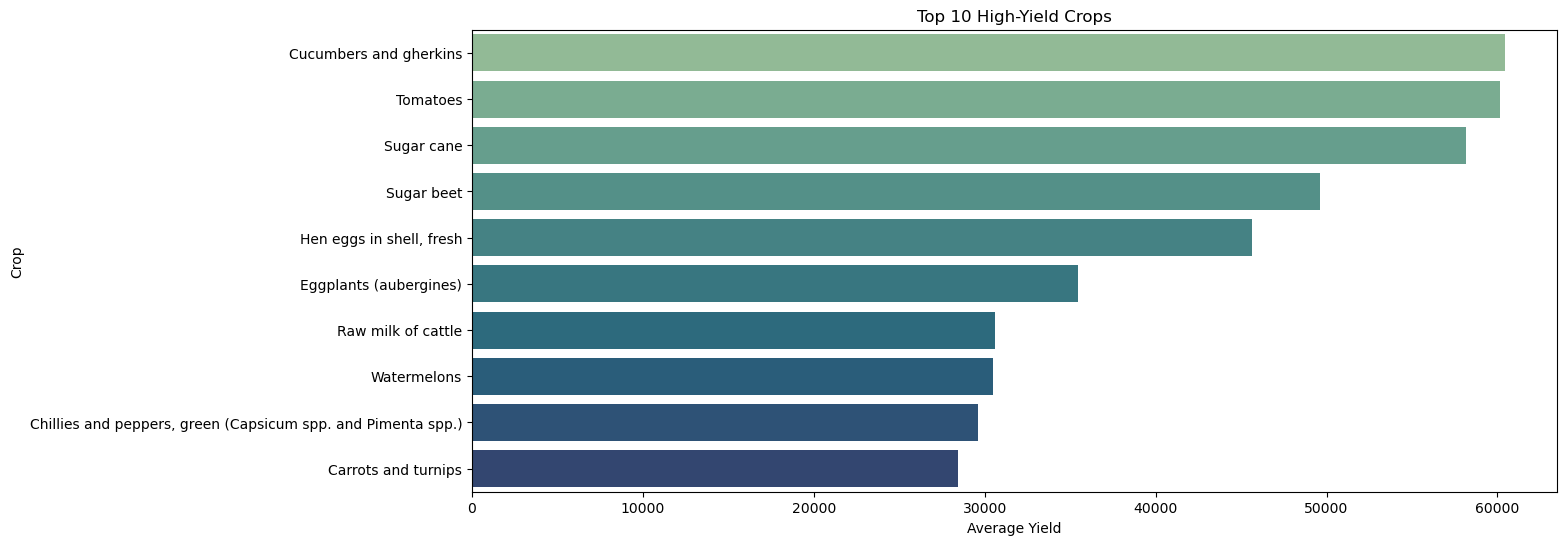

In [38]:
#Comparative Analysis
#by crop
avg_yield_crop = df_pivot.groupby('Item')['Yield'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=avg_yield_crop.head(10).values, y=avg_yield_crop.head(10).index, palette='crest')
plt.title('Top 10 High-Yield Crops')
plt.xlabel('Average Yield')
plt.ylabel('Crop')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_1928\3270289656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_production_region.head(10).values, y=avg_production_region.head(10).index, palette='flare')


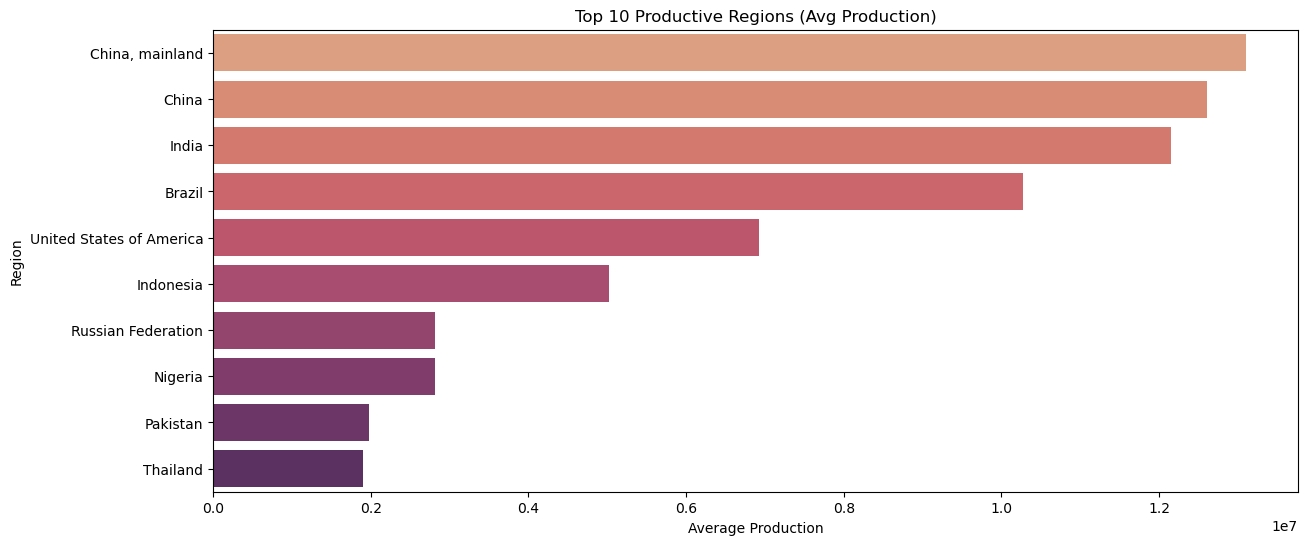

In [39]:
#by region
avg_production_region = df_pivot.groupby('Area')['Production'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=avg_production_region.head(10).values, y=avg_production_region.head(10).index, palette='flare')
plt.title('Top 10 Productive Regions (Avg Production)')
plt.xlabel('Average Production')
plt.ylabel('Region')
plt.show()

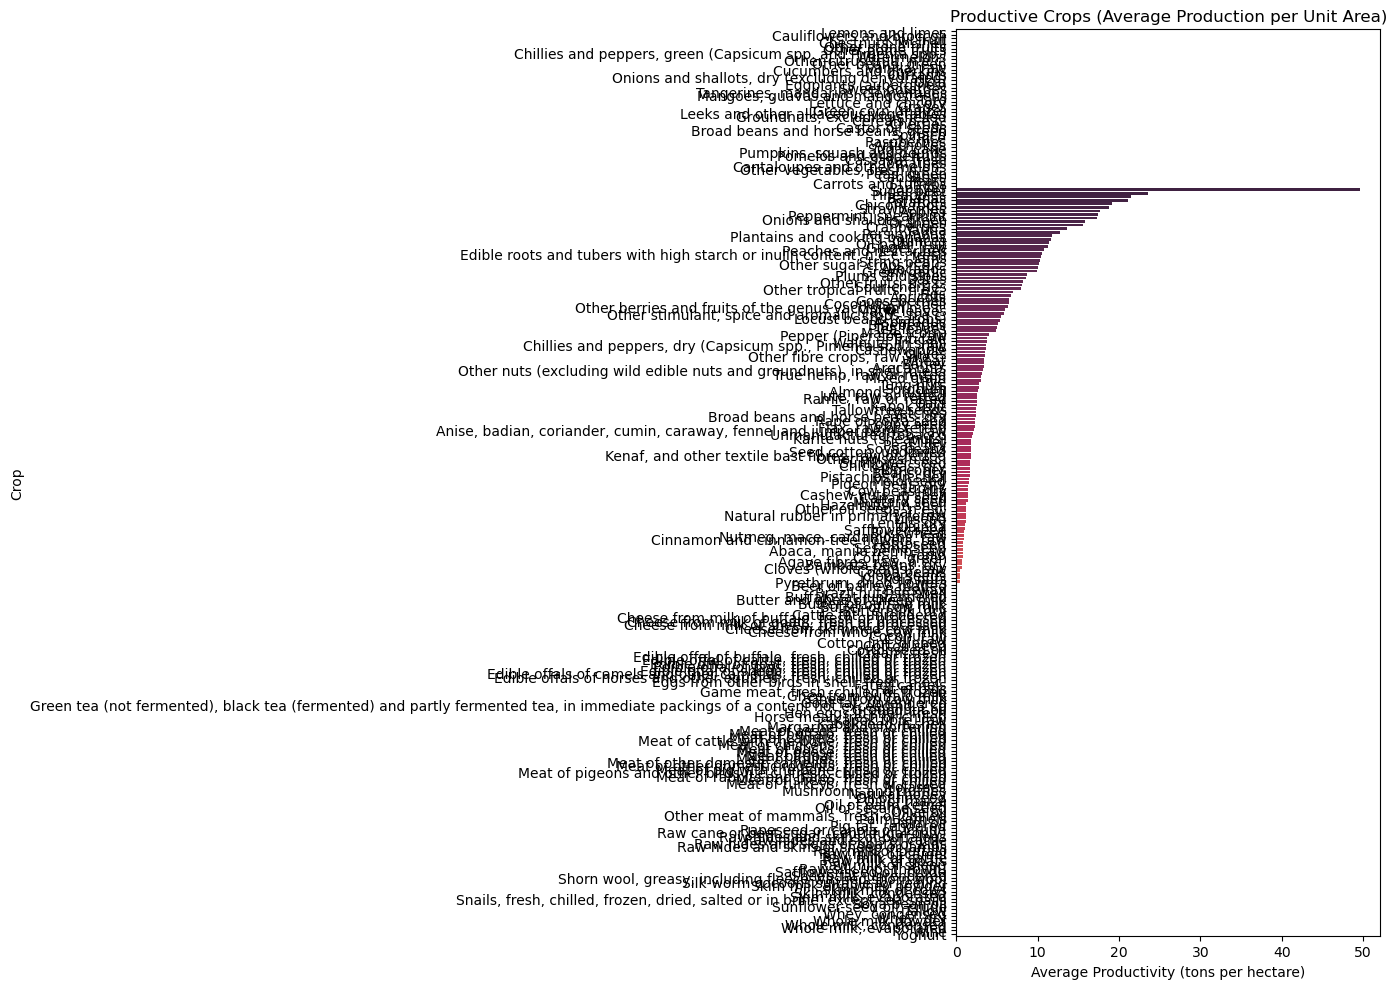

In [52]:
df_pivot['Productivity'] = df_pivot['Production'] / df_pivot['Area_Harvested']

# Top productive crops
plt.figure(figsize=(14, 10))
sns.barplot(
    x=top_productive_crops.values,
    y=top_productive_crops.index,
    hue=top_productive_crops.index,  # Set hue same as y
    palette='rocket',
    legend=False
)
plt.title('Productive Crops (Average Production per Unit Area)')
plt.xlabel('Average Productivity (tons per hectare)')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()


Column: Area_Harvested
Outliers Detected: 0
Lower Bound: -34165.00, Upper Bound: 57715.00

Column: Yield
Outliers Detected: 0
Lower Bound: -18490.50, Upper Bound: 34794.30

Column: Production
Outliers Detected: 0
Lower Bound: -146192.93, Upper Bound: 245813.45


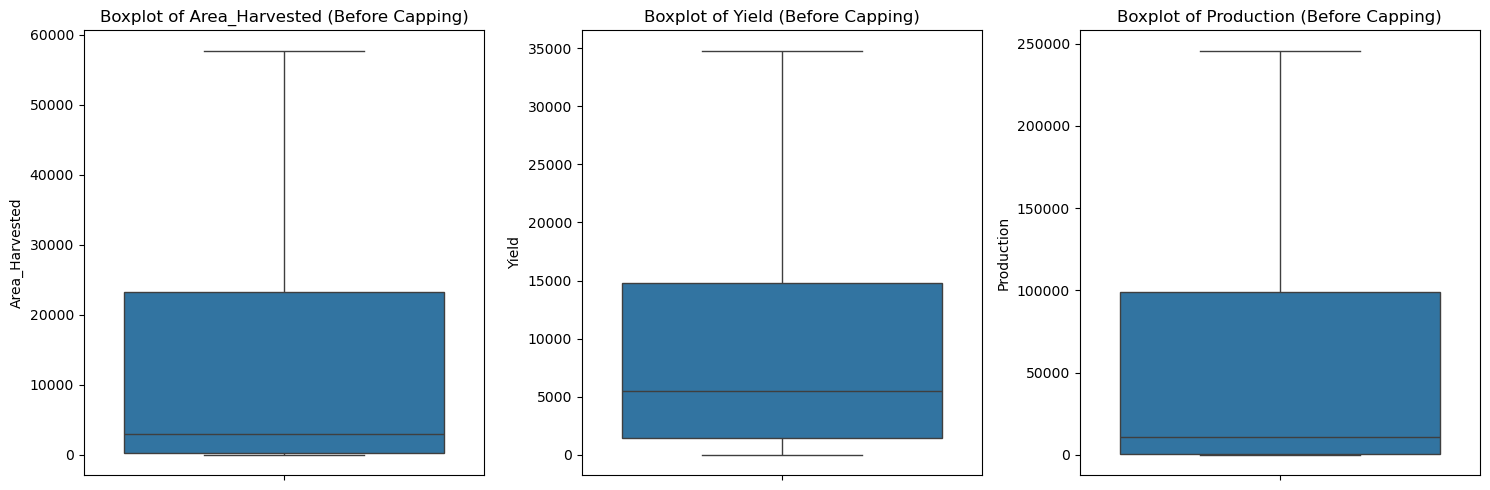

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


cols_to_check = ['Area_Harvested', 'Yield', 'Production']

# identify outliers
for col in cols_to_check:
    Q1 = df_pivot[col].quantile(0.25)
    Q3 = df_pivot[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_pivot[(df_pivot[col] < lower_bound) | (df_pivot[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Outliers Detected: {len(outliers)}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

# Plot boxplots before capping
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_pivot[col])
    plt.title(f'Boxplot of {col} (Before Capping)')
plt.tight_layout()
plt.show()

In [57]:
# Columns to cap outliers
cols_to_cap = ['Area_Harvested', 'Yield', 'Production']

for col in cols_to_cap:
    Q1 = df_pivot[col].quantile(0.25)
    Q3 = df_pivot[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df_pivot[col] = df_pivot[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

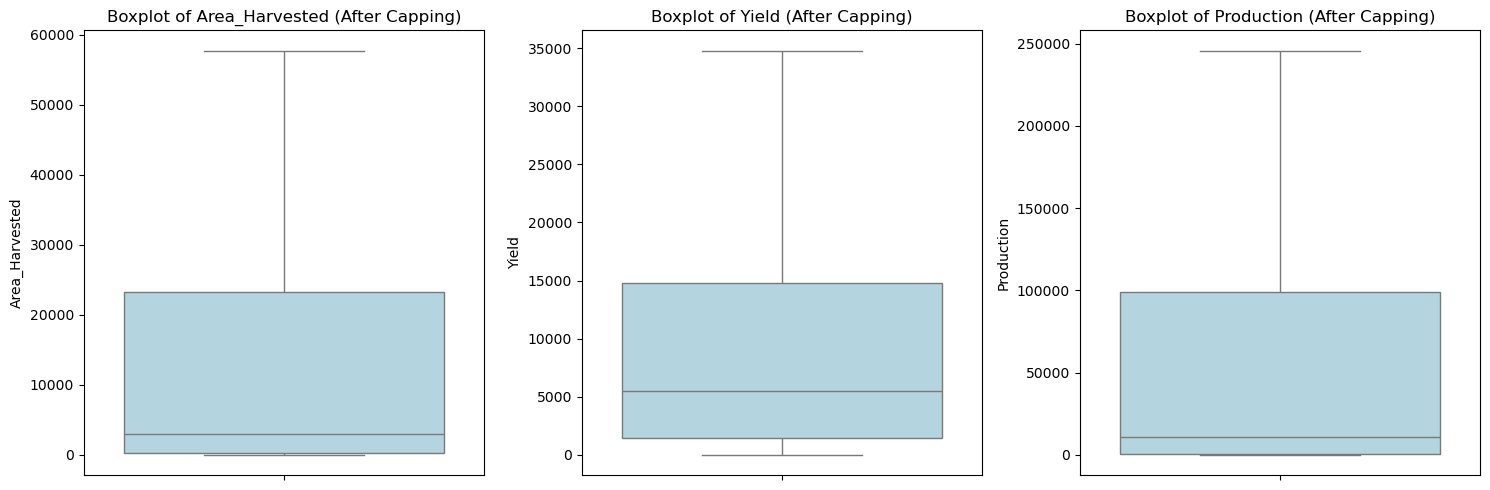

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
cols_to_plot = ['Area_Harvested', 'Yield', 'Production']

# Plot boxplots after capping
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_pivot[col], color='lightblue')
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [60]:
# Drop any rows with missing values 
df_model = df_pivot.dropna(subset=['Area_Harvested', 'Yield', 'Production'])

# features (X) and target (y)
X = df_model[['Area_Harvested', 'Yield']]
y = df_model['Production']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [62]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.7432
Mean Absolute Error: 34174.74
Root Mean Squared Error: 50011.41


In [63]:
# Compare actual vs predicted
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison.head(10))

        Actual      Predicted
0  245813.4475  198107.476555
1   12245.1700   10623.330404
2   35547.0000   39368.473561
3  245813.4475  208833.486227
4   14883.3900   13030.165831
5     130.4400  -10205.308025
6  245813.4475  314854.838941
7     229.9200  -10305.931050
8    1463.3400   -6405.773868
9    3160.0000   14090.487224


In [70]:
#doing encoding for area and item 


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Clean the dataset
df_model = df_pivot.dropna(subset=['Area_Harvested', 'Yield', 'Production', 'Area', 'Item'])

# 2. giving features and target
X = df_model[['Area_Harvested', 'Yield', 'Area', 'Item']]
y = df_model['Production']


categorical_features = ['Area', 'Item']
numeric_features = ['Area_Harvested', 'Yield']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# 4. Create pipeline
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model
pipeline.fit(X_train, y_train)

# 7. Predict
y_pred = pipeline.predict(X_test)

# 8. Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Encoded Linear Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# comparisons of predictions
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head(10))

Encoded Linear Regression Results:
R² Score: 0.7937
MAE: 33256.89
RMSE: 44827.75
        Actual      Predicted
0  245813.4475  151384.418808
1   12245.1700   30854.014664
2   35547.0000   23390.158726
3  245813.4475  247130.665772
4   14883.3900   -1108.854407
5     130.4400  -40545.454334
6  245813.4475  316617.756442
7     229.9200  -36264.886633
8    1463.3400    3040.986838
9    3160.0000    9025.926039


In [65]:
df_model.shape

(44981, 7)

In [66]:
df_model.to_csv('crop_csv.csv', index=False)

In [67]:
import os
print("Saved to:", os.path.abspath('crop_csv.csv'))

Saved to: c:\Users\brand\Desktop\guvi\crop_csv.csv


In [68]:
# Sample prediction
custom_input = pd.DataFrame([{
    'Area': 'Afghanistan',
    'Item': 'Almonds, in shell',
    'Year': 2024,
    'Area_Harvested': 36000,
    'Yield': 1800
}])

custom_prediction = pipeline.predict(custom_input)
print(f"\n Predicted Production: {custom_prediction[0]:,.2f} tons")


 Predicted Production: 96,944.67 tons


In [71]:

custom_input = pd.DataFrame([{
    'Area': 'Albania',
    'Item': 'Wheat',
    'Year': 2024,
    'Area_Harvested': 36000,
    'Yield': 1800
}])

custom_prediction = pipeline.predict(custom_input)
print(f"\n Predicted Production: {custom_prediction[0]:,.2f} tons")


 Predicted Production: 124,494.17 tons
